# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [2]:
# Check the devices that are available for computation

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 48074710210117770
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4523992750911869161
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
# Checking tensorflow version

print(tf.__version__)

2.3.1


# Exploiratory Data Analysis

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
# This mnist dataset now returns two tuples one for train data and next for test data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print("The number of train dataset:", x_train.shape)
print("The number of train dataset:", y_train.shape)
print("The number of train dataset:", x_test.shape)
print("The number of train dataset:", y_test.shape)

The number of train dataset: (60000, 28, 28)
The number of train dataset: (60000,)
The number of train dataset: (10000, 28, 28)
The number of train dataset: (10000,)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

This is the image of product at index: 26207


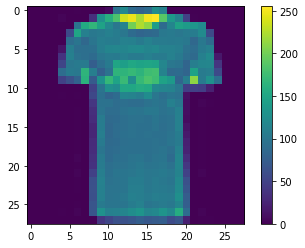

In [8]:
# Display the image of one random product

num = random.randint(0,60000)
print('This is the image of product at index:', num)
plt.imshow(x_train[num])
plt.colorbar()

# Preprocessing

In [9]:
# Data normalization and conversion to float value from int

x_train, x_test = x_train/255.0, x_test/255.0

In [10]:
print("The number of train dataset:", x_train.shape)
print("The number of train dataset:", y_train.shape)
print("The number of train dataset:", x_test.shape)
print("The number of train dataset:", y_test.shape)

The number of train dataset: (60000, 28, 28)
The number of train dataset: (60000,)
The number of train dataset: (10000, 28, 28)
The number of train dataset: (10000,)


In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
print('The maximum value of x_train is:', np.max(x_train))
print('The maximum value of x_train is:', np.max(x_test))

The maximum value of x_train is: 1.0
The maximum value of x_train is: 1.0


# Train Tensorflow Model

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))           # Input layer
model.add(Dense(256, activation='relu'))          # First Hidden layer
model.add(Dense(128, activation='relu'))          # Second Hidden layer
model.add(Dense(10, activation='softmax'))        # Output layer

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Fitting train data to the model

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4764 - accuracy: 0.8284
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3628 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3258 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3053 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2870 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2383 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.229

# Test Tensorflow Model

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('The test loss of the model is:', test_loss)
print('The test accuracy of the model is:', test_accuracy * 100, '%.')

313/313 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8820
The test loss of the model is: 0.34569400548934937
The test accuracy of the model is: 88.20000290870667 %.


#### The prediction is made based on probability. The class that has maximum probability is declared as the class of the product

In [19]:
probabilities = model.predict(x_test)

In [20]:
probabilities[0]

array([2.9101868e-08, 2.2313247e-09, 5.0608318e-09, 7.2295714e-10,
       2.0655115e-10, 2.3397468e-02, 4.3929390e-08, 4.8599588e-03,
       4.7636856e-10, 9.7174251e-01], dtype=float32)

In [21]:
# Printing the maximum probability and the class with maximum probability

print(np.max(probabilities[0]))
print(list(probabilities[0]).index(np.max(probabilities[0])))

0.9717425
9


#### Since the maximum probability of test data product at index 0 is 0.9636819 and at class 9, the product is declared to belong to class 9. Let's check if model predicts same as our conclusion.

In [22]:
class_prediction = model.predict_classes(x_test)
class_prediction[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


9

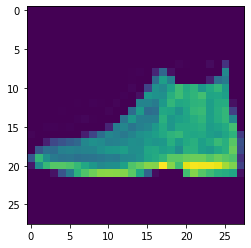

In [23]:
plt.imshow(x_test[0])

#### So the result matches our conclusion, i.e. our model predicted the product to belong to class 9, as we predicted it to.